# Credits
This notebook is based on original work by [Michael Katz](https://github.com/mikekatz04). The original version can be found in the [LATW](https://github.com/mikekatz04/LATW) repository, licensed under the [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).<br>
My modifications and solutions are for educational purposes as part of my Master's thesis project.

# LAT Workshop Tutorial #1: Sensitivity Curves, SNR, Inner Products, Likelihoods

In [1]:
# # if running in google colab
# !pip install eryn lisaanalysistools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful

In the first tutorial, we will learn how to use `lisatools` to generate sensitivity curves for LISA. With this information, we will then compute inner products, signal-to-noise ratios (SNR), and Likelihoods for a basic example source. 

## Task 1: Plotting and comparing sensitivity curves.

Calculate and plot the **sky-averaged** LISA sensitivity function ([LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)) in the characteristic strain representation. Compare the **model** used for the LDC2A (or Sangria) dataset to the Science Requirements Document version for the sensitivity curves (`scirdv1`).

Useful documentation:
* [get_available_default_lisa_models](https://mikekatz04.github.io/LISAanalysistools/build/html/user/main.html#lisatools.detector.get_available_default_lisa_models)
* [get_stock_sensitivity_options](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_stock_sensitivity_options)
* [get_sensitivity](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_sensitivity)
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)

This paper has a nice description of sensitivity curves of LISA [The construction and use of LISA sensitivity curves](https://arxiv.org/abs/1803.01944).

In [3]:
# useful imports
from lisatools.sensitivity import LISASens, get_sensitivity, get_stock_sensitivity_options
import lisatools.detector as lisa_models

In [4]:
get_stock_sensitivity_options()

['X1TDISens',
 'Y1TDISens',
 'Z1TDISens',
 'XY1TDISens',
 'YZ1TDISens',
 'ZX1TDISens',
 'A1TDISens',
 'E1TDISens',
 'T1TDISens',
 'X2TDISens',
 'Y2TDISens',
 'Z2TDISens',
 'LISASens',
 'CornishLISASens',
 'FlatPSDFunction']

X, Y and Z are the names of the three spacecrafts of LISA. X1TDISens is the TDI generation 1 response of the X channel of LISA. There are also cross responses like XY1TDISens. X2TDISens is the TDI gen 2 response of the X channel. 
I don't know what LISASens', 'CornishLISASens', or 'FlatPSDFunction' exactly to be honest... for now...

In [5]:
lisa_models.get_available_default_lisa_models()

[LISAModel(Soms_d=2.25e-22, Sa_a=9e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x10f7867b0>, name='scirdv1'),
 LISAModel(Soms_d=9.999999999999999e-23, Sa_a=9e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x1080c3440>, name='proposal'),
 LISAModel(Soms_d=9.999999999999999e-23, Sa_a=5.76e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x10ce03020>, name='mrdv1'),
 LISAModel(Soms_d=6.241e-23, Sa_a=5.76e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x10d847860>, name='sangria')]

[Sangria](https://lisa-ldc.lal.in2p3.fr/challenge2a) is the name of a dataset generated by the LDC community.

Command + click get_sensitivity
1. get_sensitivity -> requires f, sens_fn, return_type, *args, **kwargs
2. `model = lisa_models.sangria` and `average = 'True'` are kwargs
3. in the code for get_sensitivity: **kwargs: Keyword arguments to pass to sensitivity function ``get_Sn`` method.
4. notice: sensitivity = check_sensitivity(sens_fn) -> cmd + click check_sensitivity
5. sensitivity: Any: This is a type hint for the parameter sensitivity. It means that sensitivity can be of any type (Any is imported from typing).
6. notice: def check_sensitivity(sensitivity: Any) -> Sensitivity:
7. -> Sensitivity: This is a return type hint, indicating that the function is expected to return a value of type Sensitivity.
8. Go to the Sensitivity class. The return of check_sensitivity is an object of Sensitivity -> sensitivity in the function get_sensitivity is an object of Sensitivity.
9.  `PSD = sensitivity.get_Sn(f, *args, **kwargs)` -> Go to the Sensitivity class and the `get_Sn` class method. It requires the input `model`. What is `average`?
10. There is also a class LISASens(Sensitivity): @classmethod def get_Sn(..., average: bool = True,..). This is where the `average` keyword is being used

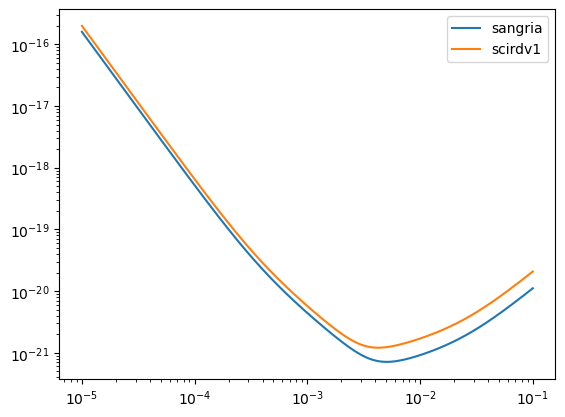

In [6]:
# Make an array of frequencies
f = np.logspace(-5, -1, 10000)

sens_sangria = get_sensitivity(f , sens_fn='LISASens', model = lisa_models.sangria, return_type='char_strain', average = 'True')
plt.loglog(f, sens_sangria, label='sangria')

sens_scirdv1 = get_sensitivity(f , sens_fn='LISASens', model = lisa_models.scirdv1, return_type='char_strain', average = 'True')
plt.loglog(f, sens_scirdv1, label='scirdv1')

plt.legend()

### Question 1

How do you expect the difference in sensitivity curve models to affect LISA observations? Consider what higher noise at lower or high frequencies will do to our different source classes. 

I don't really understand the first question tbh. 
Higher noise at the lower frequency would affect MBHBs and at higher frequencies would affect LIGO type binaries.

### Question 2

We have asked you to compute the sky-averaged sensitivity curves. What does that mean? Can you determine, without looking at the documentation what the total sky-averaging factor is?

See this paper for sky averaging https://arxiv.org/pdf/1803.01944  

See the documentation for the get_Sn classmethod in class LISASens(Sensitivity). I don't yet know where we get these factors from.

av_resp = np.sqrt(5) #Average the antenna response

Proj = 2.0 / np.sqrt(3) #Projection effect

print(av_resp * Proj)  --> np.float64(2.5819888974716116)

##Approximative transfer function

f0 = 1.0 / (2.0 * lisaLT)

a = 0.41

T = np.sqrt(1 + (f / (a * f0)) ** 2)

sens = (av_resp * Proj * T * all_m / lisaL) ** 2

In [7]:
Sn_averaged  = get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=True, return_type="char_strain")
Sn =           get_sensitivity(f, sens_fn=LISASens, model=lisa_models.sangria, average=False, return_type="char_strain")

print(np.average(Sn_averaged / Sn))

2.5819888974716116


Now we are going to put our sensitivity information into a [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix). Build a two-channel (with no cross-channels) sensitivity matrix where both channels' sensitivity are governed by the [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens) sensitivity function.

Useful documentation:
* [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)
* [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.loglog) 

We will add one extra useful piece of information into here: an estimated Galactic foreground noise to include in the sensitivity. This is important when performing LISA data analysis.

The default foreground function is `FittedHyperbolicTangentGalacticForeground`. It takes one parameter: observation time in seconds. Use the documentation of the sensitivity function and the stochastic function to determine how to pass this information with the abstracted setup in `lisatools`. 

Useful documentation:
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)
* [FittedHyperbolicTangentGalacticForeground](https://mikekatz04.github.io/LISAanalysistools/build/html/user/stochastic.html#lisatools.stochastic.FittedHyperbolicTangentGalacticForeground)

The sensitivity matrix is designed to house sensitivity information that will enter into the Likelihood function. It is a matrix because the 3 channels in LISA will be correlated. Therefore, in XYZ channels, this is a 3x3 matrix that includes correlated cross-terms between the channels. When working with AET channels (uncorrelated in idealized noise situations), then the sensitivity matrix will be an array of length 2 for AE or 3 for AET. 

In [8]:
from lisatools.sensitivity import SensitivityMatrix, LISASens, A1TDISens

In [9]:
sens_mat = SensitivityMatrix(f, [LISASens, A1TDISens])
sens_mat.__dict__

{'_frequency_arr': array([1.00000000e-05, 1.00092155e-05, 1.00184395e-05, ...,
        9.98159444e-02, 9.99079298e-02, 1.00000000e-01], shape=(10000,)),
 'data_length': 10000,
 'sens_args': (),
 'sens_kwargs': {},
 'sens_mat_input': [lisatools.sensitivity.LISASens,
  lisatools.sensitivity.A1TDISens],
 '_sens_mat': array([[3.94498567e-27, 3.92324806e-27, 3.90163023e-27, ...,
         4.30197305e-39, 4.30945201e-39, 4.31694476e-39],
        [1.07039595e-39, 1.06842725e-39, 1.06646217e-39, ...,
         1.51010194e-38, 1.50716288e-38, 1.50411994e-38]], shape=(2, 10000)),
 'return_shape': (2,),
 'detC': array([4.22269668e-66, 4.19170512e-66, 4.16094103e-66, ...,
        6.49641783e-77, 6.49504611e-77, 6.49320272e-77], shape=(10000,)),
 'invC': array([[2.53486345e+26, 2.54890842e+26, 2.56303119e+26, ...,
         2.32451479e+38, 2.32048065e+38, 2.31645308e+38],
        [9.34233731e+38, 9.35955166e+38, 9.37679771e+38, ...,
         6.62206952e+37, 6.63498293e+37, 6.64840596e+37]], shape=(2, 

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

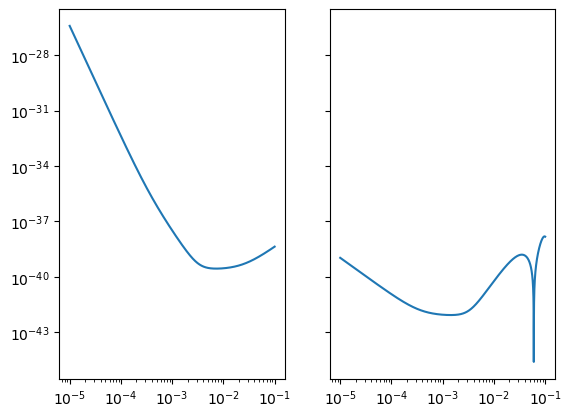

In [10]:
sens_mat.loglog()

Compare the noise curve with and without foreground confusion noise. And then compare the foreground noise at two different values of the observation time. 

Useful documentation:
* [update_stochastic](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.update_stochastic)

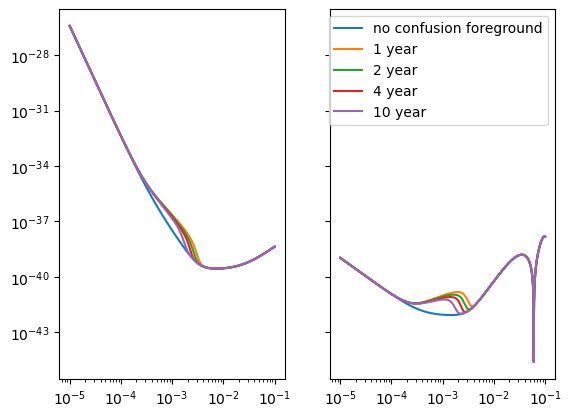

In [11]:
sens_mat_no_confusion_foreground = deepcopy(sens_mat)
sens_mat_no_confusion_foreground.update_stochastic(stochastic_params=None)

sens_mat_1_year = deepcopy(sens_mat)
sens_mat_1_year.update_stochastic(stochastic_params=(1 * YRSID_SI,))

sens_mat_2_year = deepcopy(sens_mat)
sens_mat_2_year.update_stochastic(stochastic_params=(2 * YRSID_SI,))

sens_mat_4_year = deepcopy(sens_mat)
sens_mat_4_year.update_stochastic(stochastic_params=(4 * YRSID_SI,))

sens_mat_10_year = deepcopy(sens_mat)
sens_mat_10_year.update_stochastic(stochastic_params=(10 * YRSID_SI,))

#sens_mat_no_confusion_foreground.loglog(label='no confusion foreground')
#sens_mat_1_year.loglog(label='1 year')
#sens_mat_2_year.loglog(label='2 year')
#sens_mat_4_year.loglog(label='4 year')

fig, ax = sens_mat_no_confusion_foreground.loglog(label='no confusion foreground')
sens_mat_1_year.loglog(label='1 year', fig=fig, ax=ax)
sens_mat_2_year.loglog(label='2 year', fig=fig, ax=ax)
sens_mat_4_year.loglog(label='4 year', fig=fig, ax=ax)
sens_mat_10_year.loglog(label='10 year', fig=fig, ax=ax)
plt.legend()

### Question

Why does the foreground confusion change over time? What are the broader implications of this on our analysis?

In addition to the instrument noise, unresolved galactic binaries act as an effective noise source. The galactic confusion noise goes down as the mission progresses and more foreground sources are removed. Hence the curve approaches the ideal curve as time increases

### Task 2: Build a `DataResidualArray` to house and plot data information.

We are going to build a sinusoidal signal for us to do some computations with. We will store it in a [DataResidualArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray). Build a sinusoidal signal with 4 parameters: $A$ (amplitude), $f_0$ (frequency), $\dot{f}_0$ (frequency derivative), and $\phi_0$ (initial phase):

$$ h_1(t) = A\sin{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$
$$ h_2(t) = A\cos{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$

Pick your parameters. Use a reasonable timestep ($\sim10$) and observation time ($\sim$ yr) for LISA. Plot $h_1$ and $h_2$. 

(31556130.0, 31558130.0)

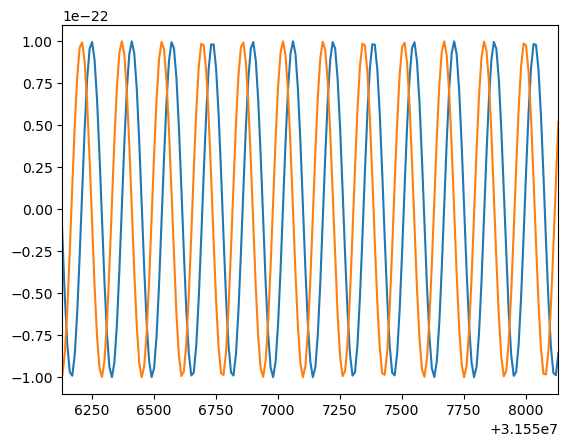

In [12]:
dt = 10.0
Tobs = YRSID_SI
Nobs = int(Tobs / dt)
t = np.arange(Nobs) * dt
 
A = 1e-22
f0 = 3e-3
fdot = 1e-10
phi0 = 4.2

h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
plt.plot(t, h1, label="h1")
plt.plot(t, h2, label="h2")
plt.xlim(t[-1] - 2000.0, t[-1])

Now we will add our two channels (h1, h2) into a `DataResidualArray`. Plot the signals with the data residual array plotting functions.

Useful Documentation:
* [DataResidualArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray)
* [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray.loglog)

`DataResidualArray` provides a container to hold Data, residual, or template information. This class abstracts the connection with the sensitivity matrices to make this analysis as generic as possible for the user frontend, while handling special computations in the backend. It can contain both time and frequency domain data. We have to provide either dt or df as well.

In [13]:
# useful imports
from lisatools.datacontainer import DataResidualArray
data_res_arr = DataResidualArray([h1, h2], dt=dt)

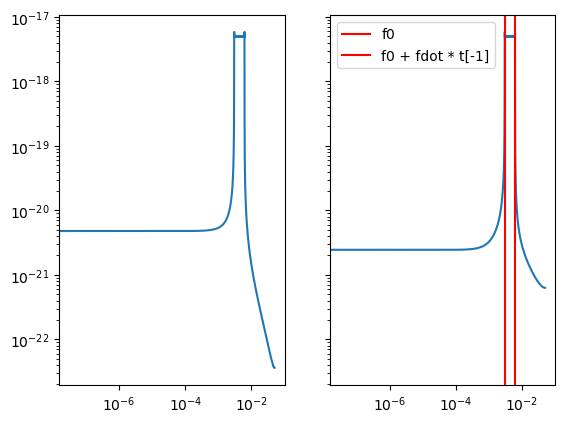

In [ ]:
data_res_arr.loglog()
plt.axvline(f0, color='r', label='f0')
plt.axvline(f0 + fdot * t[-1], color='r', label='f0 + fdot * t[-1]')
plt.legend()

# This makes sense. All the frequencies between f0 and f0 + fdot * t[-1] are present equally in the signal (it's horizontal in the frequency domain)
# For the parts outside this frequency range, it is due to the 1/2 fdot * t^2 term in the signal. 
# This is a linear chirp, so the frequency is not constant, but it is changing linearly with time.
# The Fourier transform of a linear chirp is not a delta function, but rather a sinc function. 
# This means that the signal has energy spread over a range of frequencies, which is why we see the "leakage" in the frequency domain plot.

### Question 3

When you put in the time-domain signal from above, the `DataResidualArray` class transforms it under the hood. Looking at the output from above, what transform did it do?

Let's take the FFT of our input time-domain dataset with numpy (`np.fft.rfft`) and add this to the above plot. 

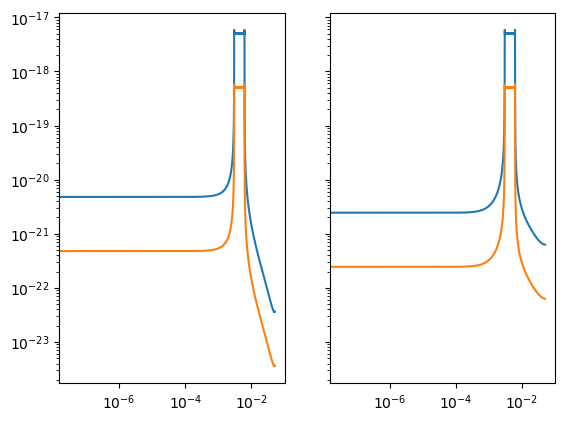

In [15]:
fig, ax = data_res_arr.loglog()
h1_f = np.abs(np.fft.rfft(h1))
h2_f = np.abs(np.fft.rfft(h2))
ax[0].loglog(data_res_arr.f_arr, h1_f)
ax[1].loglog(data_res_arr.f_arr, h2_f)

What is the factor difference between the FFT we did and the frequency-domain spectra stored in our `DataResidualArray`? Where does this term come from and why is it there? (this is a small detail that is always easy to forget)

The ratio is 10. dt is also 10...

In [16]:
data_res_arr.shape   # why does this work?

(2, 1577908)

In [17]:
print(np.abs(data_res_arr[0]) / h1_f)
print(np.abs(data_res_arr[1]) / h2_f)

[10. 10. 10. ... 10. 10. 10.]
[10. 10. 10. ... 10. 10. 10.]


## Task 3: Combine into an `AnalysisContainer`.

Now we will use our data and sensitivity information and combine it into an [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container) object. This object helps streamline the analysis by working under the hood properly with different data and sensitivity matrices.

Plot the new setup with both the data and sensitivity information. We will do computations with this object a little later. 

Helpful documentation:
* [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container)
* [AnalysisContainer.loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.loglog)

In [18]:
from lisatools.analysiscontainer import AnalysisContainer

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

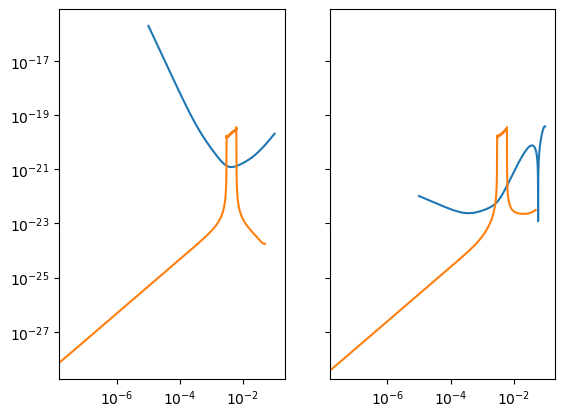

In [19]:
analysis = AnalysisContainer(data_res_arr, sens_mat)
analysis.loglog()

## Task 4: Compute the inner product.

Now we will inject a signal into the data and calculate the inner product of another signal with that data. We will take `data_res_arr` as the data input. 

Generate a new signal witih a slightly different set of parameters from the injection you chose above. 

Here, data_res_arr is playing the role of the data (the actual GW signal that we measure). And we are matching it using a template (this is why the variable is named template and why this method in GW physics is called template matching.)

In [ ]:
A_new = A # 1.01e-22
f0_new = f0 # 3.0000003e-3
fdot_new = fdot * (1.000001)
phi0_new = phi0  # 3.1

h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)

What is the inner product value of your new signal with the injected data? With numpy calculate the inner product using this equation:

$$ \langle h_1 | h_2 \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}_1(f)^*\tilde{h}_2(f)}{S_n(f)}df \ \ .$$

The above equation confused me because they wrote h1 and h2. Writing h1_old and h1_new makes more sense in this context. This is what we have to do in the following cell when we calculate the inner product.

$$ \langle h_1^{\text{old}} | h_1^{\text{new}} \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}^{\text{old}}_1(f)^*\tilde{h}^{\text{new}}_1(f)}{S_n(f)}df \ \ .$$

In [21]:
# make a new DataResidualArray called template with the new h1 and h2 and the same dt
template = DataResidualArray([h1_new, h2_new], dt=dt)

# update the frequency array of the old sensitivity matrix with the new frequency array as we used a different fdot
sens_mat.update_frequency_arr(template.f_arr)

# compute the inner product of the template with the data residual array using the above equation
# note that we take template[:, 1:] and data_res_arr[:, 1:]
h_old_0_and_h_new_0_innerproduct = 4 * template.df * np.real(np.sum(template[:, 0:].conj() * data_res_arr[:, 0:] / sens_mat[:, 0:]))
h_old_1_and_h_new_1_innerproduct = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * data_res_arr[:, 1:] / sens_mat[:, 1:]))

print(h_old_0_and_h_new_0_innerproduct)
print(h_old_1_and_h_new_1_innerproduct)

/opt/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/detector.py:633: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/opt/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/detector.py:635: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/opt/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/detector.py:637: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/opt/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/detector.py:642: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/opt/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/detector.py:644: RuntimeWarning: invalid value encountered in multiply
  Soms_nu = Soms_d * (2.0 * np.pi * frq / C_SI) ** 2


105413.46296982642
105413.46296982636


Now, calculate the inner product using the [inner_product](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.inner_product) method in the `AnalysisContainer` class. 

In [22]:
analysis.template_inner_product(template=template)

105413.46296982629

The numbers may not match exactly. Under the hood, the inner product function in `lisatools` uses `np.trapz`. If you do a sum, you may get a very small and negligible difference.

Play around with the parameters you chose above. Try to understand how the inner product changes with the parameters you choose (i.e. how far they are from the injection parameters). 

## Task 5: Compute the signal-to-noise ratio.

There are two signal-to-noise ratios (SNR) that are of interest to LISA folks. One is the optimal SNR ($\rho_\text{opt}$) of a template. This is the maximal SNR a template can achieve with a given noise profile ($h$ is the template):
$$ \rho_\text{opt} = \sqrt{\langle h | h \rangle}\ \ .  $$
In other words, if the injection data is exactly equivalent to the template, it will achieve this SNR. 

Another SNR of interest is the detected snr ($\rho_\text{det}$). It is given by,
$$ \rho_\text{det} = \frac{\langle d | h \rangle}{\sqrt{\langle h | h \rangle}} = \frac{\langle d | h \rangle}{\rho_\text{opt}}\ \ .  $$

Above, you calcualted $\langle d | h \rangle$, now calculate $\langle h | h \rangle$ with numpy array operations and compute the optimal and detected SNR.

In [23]:
# let's only work with h_old_1_and_h_new_1_innerproduct. 
hold_hnew = h_old_1_and_h_new_1_innerproduct
hnew_hnew = 4 * template.df * np.real(np.sum(template[:, 1:].conj() * template[:, 1:] / sens_mat[:, 1:]))
print(hnew_hnew)
print(f"Opt SNR: {np.sqrt(hnew_hnew)}, Det SNR: {hold_hnew / np.sqrt(hnew_hnew)}")

105877.74904491061
Opt SNR: 325.3886123466994, Det SNR: 323.96174595535325


To compute these values with the `AnalysisContainer` object, use the [template_snr](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method.

In [24]:
# From before: analysis = AnalysisContainer(data_res_arr, sens_mat)
# See the code for teplate_snr using cmd+click. It returns the optimal and detected SNR automatically!
# Returns: ``(optimal snr, detected snr)``.

opt_snr, det_snr = analysis.template_snr(template=template)
print(f"Opt SNR: {opt_snr}, Det SNR: {det_snr}")

Opt SNR: 325.38861234669923, Det SNR: 323.9617459553532


### Question

How does changing the parameters of your template affect the optimal SNR and the detected SNR?

Here, data_res_arr is playing the role of the data (the actual GW signal that we measure). And we are matching it using a template (this is why the variable is named template and why this method in GW physics is called template matching.)
I changed the frequency of the template drastically this time. Before it was fdot*(1.000001) and now it is fdot*(1.001). The SNR got much much worse. Low SNR = bad.

Opt SNR: 325.27711261700165, Det SNR: 26.251968524600017

In [25]:
fdot_new = fdot * (1.001)
h1_new_2 = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)
h2_new_2 = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)

# make a new template
template_2 = DataResidualArray([h1_new_2, h2_new_2], dt=dt)

# update the frequency array of the old sensitivity matrix with the new frequency array as we used a different fdot
sens_mat.update_frequency_arr(template_2.f_arr)

print(analysis.template_inner_product(template=template_2))

opt_snr_2, det_snr_2 = analysis.template_snr(template=template_2)
print(f"Opt SNR: {opt_snr_2}, Det SNR: {det_snr_2}")

8539.164522194305
Opt SNR: 325.27711261700165, Det SNR: 26.251968524600017


## Task 6: Compute the Likelihood. 

The Likelihood used in LISA (and other areas of GWs) is a Gaussian likelihood that replaces the typical $\frac{x - \mu}{\sigma}$ term with the noise-weighted inner product of the residual data with itself: $\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle$. Let's break that down. 

1) What do we mean when we say residual? It is the difference between the data and the template.

$$ \vec{r} = \vec{d} - \vec{h} $$

Calculate the residual of the data and the template and store it in a new `DataResidualArray`.

In [26]:
r1 = h1_new - h1
r2 = h2_new - h2

residual = DataResidualArray([r1, r2], dt=dt)

2) Calculate the inner product of the residual with itself. Hint: You can put it in a new `AnalysisContainer` and calculate it directly with that. 

In [27]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

928.654966658588


3) Build the full Likelihood. The Gaussian likelihood is given by,
$$ \mathcal{L} = e^{-\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle} \ \ . $$

We usually work with the natural log of the Likelihood:
$$ \ln{\mathcal{L}} = -\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle \ \ . $$

With this in mind. Take the inner product value from above and calculate the Likelihood of this template. 

In [28]:
likelihood = -1/2 * analysis_res.inner_product()
print(f"Likelihoood: {likelihood}")

Likelihoood: -464.327483329294


We can also break apart the inner product into separate pieces because the inner product is a linear operation:
$$ \ln{\mathcal{L}} = -\frac{1}{2}\left(\langle \vec{d} | \vec{d}\rangle + \langle \vec{h} | \vec{h}\rangle - 2 \langle \vec{d} | \vec{h}\rangle\right) \ \ . $$

You should see some familiar terms emerging:
* $\langle \vec{h} | \vec{h}\rangle = \rho_\text{opt}^2$
* $\langle \vec{d} | \vec{h}\rangle \sim \rho_\text{det} * \rho_\text{opt}$ (when phase maximized)
* $\langle \vec{d} | \vec{d}\rangle$ is the inner product of the data with itself. In MCMC analysis generally, the $\langle \vec{d} | \vec{d}\rangle$ term will remain constant throughout sampling.

You can calculate the Likelihood of a template against the data using the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_likelihood) method in the `AnalysisContainer` class. 

In [29]:
analysis.template_likelihood(template)

np.float64(-464.32748332932533)

### Question:


How does changing the parameters effect the Likelihood? How does that relate to the optimal and detected SNR values? There are two interesting keyword arguments in the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method: `include_psd_info` and `phase_maximize`. The `phase_maximize` argument can be found for both the Likelihood and SNR computations. Reading the documentation and adding those keyword arguments in, can you figure out what they are doing with these calculations?

In [30]:
r1_new_2 = h1_new_2 - h1
r2_new_2 = h2_new_2 - h2

residual_2 = DataResidualArray([r1_new_2, r2_new_2], dt=dt)

analysis_res_2 = AnalysisContainer(residual_2, sens_mat)
print(analysis_res_2.inner_product())

print(analysis_res_2.template_likelihood(template=template))

194604.7028094657
-247113.4012834618


When we're dealing with log_likelihood, all the functions minimize it, but we want to maximize it. So if we take the negative of the log_likelihood, we would have to minimize it.

log_likelihood: 
- big negative number = bad
- small negative number = good

negavite_log_likelihood:
- big number = good
- small number = bad

## Task 7: Add a signal model. 

Now we will add a signal model to our Likelihood class. You can either set it as a keyword argument when instantiating the `AnalysisContainer`. Or you can just set it as an attribute after the fact. 

But first, we need to turn our sinusoidal signal into a function. Build a function that takes our four parameters ($A$, $f_0$, $\dot{f}_0$, and $\phi_0$) and returns a list of `[h1, h2]`. Add the time array as an argument to your generator. So it should have a signature like: `sinusoidal_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)`

In [31]:
def sinusoidal_waveform(A: float, f0: float, fdot: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]:
    h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    return [h1, h2]

Now add the signal model to our Likelihood class by updating the `signal_gen` attribute. 

[Documentation of `signal_gen`](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer)

signal_gen (Optional[callable], default: None):
- Callable object that takes information through *args and **kwargs and 
- generates a signal in the proper channel setup employed in data_res_arr and sens_mat.

In [32]:
analysis.signal_gen = sinusoidal_waveform

Calculate the Likelihood with a new set of parameters. Remember to add `t` as a last argument to your inputs.

Helpful documentation:
* [AnalysisContainer.calculate_signal_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.calculate_signal_likelihood)

In [33]:
analysis.calculate_signal_likelihood(A*1.01, f0*1.00, fdot, phi0, t, source_only=True)

np.float64(-5.2938915930863)

## Extra practice

 Now repeat various parts of the tutorial adjusting the signal or the sensitivity model. Observe how that changes the inner product, SNR, and Likelihood. Having an understanding of these elements is crucial to LISA data analysis!

All the classes in LISA Tools use many concepts from classes. I wrote the following simple code for me to come back to, to understand these concepts. I had no idea about things like @property or .setter or dunder methods. I made a simple, well-commented Python program that illustrates everything used in those Classes:

* Dunder methods (__init__, __str__, __add__, __sub__, __len__)
* Operator overloading (+ and - for custom behavior)
* Private variables (_data)
* Property and setter methods (@property, @setter)

Example: A Simple Bag Class: Imagine we have a Bag class that stores items and allows:
* Adding two Bag objects (+ operator)
* Removing items from one bag using the - operator
* Using len(bag) to get the number of items
*  Using getter & setter methods for encapsulation

In [34]:
class Bag:
    def __init__(self, items=None):
        """
        Initializes the Bag with a list of items.

        Args:
            items (list, optional): A list of items to start with. Default is an empty list.
        """
        self._data = items if items else []  # Private variable to store items

    def __str__(self):
        """
        Defines the string representation of the Bag.
        """
        return f"Bag with items: {self._data}"

    def __add__(self, other):
        """
        Overloads the + operator to combine two bags.
        
        Args:
            other (Bag): Another Bag object.
        
        Returns:
            Bag: A new Bag containing items from both bags.
        """
        if isinstance(other, Bag):
            return Bag(self._data + other._data)  # Combine both bags
        raise TypeError("Can only add another Bag.")

    def __sub__(self, item):
        """
        Overloads the - operator to remove an item from the Bag.
        
        Args:
            item: The item to remove.
        
        Returns:
            Bag: A new Bag without the item (if it existed).
        """
        if item in self._data:
            new_items = self._data.copy()
            new_items.remove(item)
            return Bag(new_items)  # Return a new Bag with the item removed
        return self  # If item not found, return the same Bag

    def __len__(self):
        """
        Returns the number of items in the Bag.
        """
        return len(self._data)

    @property
    def items(self):
        """
        Property that allows access to the items in the Bag (read-only).
        """
        return self._data.copy()  # Returns a copy to prevent direct modification

    @items.setter
    def items(self, new_items):
        """
        Setter method that allows updating the Bag's items, only if the input is a list.
        
        Args:
            new_items (list): New list of items.
        
        Raises:
            TypeError: If new_items is not a list.
        """
        if not isinstance(new_items, list):
            raise TypeError("Items must be a list.")
        self._data = new_items  # Update the private variable


# ───────────────────────── Example Usage ─────────────────────────

# Creating Bags
bag1 = Bag(["apple", "banana", "cherry"])
bag2 = Bag(["grape", "mango"])

print(bag1)  # Calls __str__ → Output: Bag with items: ['apple', 'banana', 'cherry']

# Adding two bags (calls __add__)
bag3 = bag1 + bag2
print(bag3)  # Output: Bag with items: ['apple', 'banana', 'cherry', 'grape', 'mango']

# Removing an item (calls __sub__)
bag4 = bag3 - "banana"
print(bag4)  # Output: Bag with items: ['apple', 'cherry', 'grape', 'mango']

# Checking length (calls __len__)
print(len(bag4))  # Output: 4

# Using the @property method
print(bag1.items)  # Calls the getter → Output: ['apple', 'banana', 'cherry']

# Modifying items using the setter method
bag1.items = ["orange", "pear"]
print(bag1)  # Output: Bag with items: ['orange', 'pear']

# Trying to set a wrong type (triggers setter TypeError)
try:
    bag1.items = "Not a list"  # ❌ This should raise an error
except TypeError as e:
    print(f"Error: {e}")


Bag with items: ['apple', 'banana', 'cherry']
Bag with items: ['apple', 'banana', 'cherry', 'grape', 'mango']
Bag with items: ['apple', 'cherry', 'grape', 'mango']
4
['apple', 'banana', 'cherry']
Bag with items: ['orange', 'pear']
Error: Items must be a list.
